In [101]:
# imports
import bz2
import pickle5 as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:
# functions
# Load any compressed pickle file
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

In [103]:
df = decompress_pickle('6nutrients.pbz2')

In [104]:
df1 = df.copy()
# add a column for value counts by id
df1['id_count'] = df.groupby('id')['id'].transform('count')

df1.head()

,id,date,total.calories,total.carbs,total.fat,total.protein,total.sodium,total.sugar,goal.calories,goal.carbs,goal.fat,goal.protein,goal.sodium,goal.sugar,id_count
0,1,2014-09-14,2924.0,340.0,114.0,186.0,3658.0,109.0,3173.0,396.0,105.0,160.0,2300.0,119.0,174
1,1,2014-09-15,2430.0,96.0,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0,174
2,1,2014-09-16,1862.0,158.0,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0,174
3,1,2014-09-17,2251.0,187.0,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0,174
4,1,2014-09-18,2001.0,113.0,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0,174


In [105]:
id_1 = df1[df1["id"] == 1]
id_1=  id_1[id_1["goal.calories"] < 4578]
id_1.info()
date_time = pd.to_datetime(id_1.pop('date'), format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              173 non-null    int64  
 1   date            173 non-null    object 
 2   total.calories  173 non-null    float64
 3   total.carbs     173 non-null    float64
 4   total.fat       173 non-null    float64
 5   total.protein   173 non-null    float64
 6   total.sodium    173 non-null    float64
 7   total.sugar     173 non-null    float64
 8   goal.calories   173 non-null    float64
 9   goal.carbs      173 non-null    float64
 10  goal.fat        173 non-null    float64
 11  goal.protein    173 non-null    float64
 12  goal.sodium     173 non-null    float64
 13  goal.sugar      173 non-null    float64
 14  id_count        173 non-null    int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 21.6+ KB


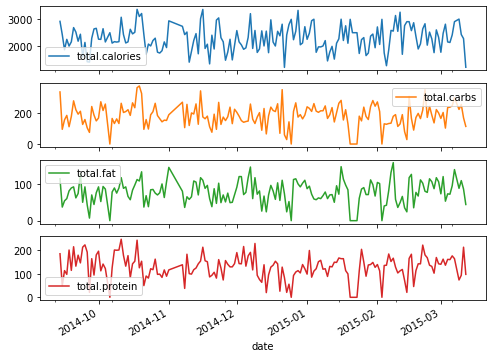

In [106]:
plot_cols = ['total.calories', 'total.carbs','total.fat','total.protein']
plot_features = id_1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [107]:
id_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,173.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
total.calories,173.0,2298.427746,475.494482,1203.0,1990.0,2258.0,2584.0,3373.0
total.carbs,173.0,183.820809,74.835535,0.0,142.0,186.0,232.0,379.0
total.fat,173.0,77.260116,31.750233,0.0,59.0,77.0,100.0,158.0
total.protein,173.0,128.554913,52.007196,0.0,99.0,132.0,161.0,248.0
total.sodium,173.0,2050.289017,899.857248,0.0,1538.0,2049.0,2758.0,4267.0
total.sugar,173.0,81.514451,38.544237,0.0,55.0,78.0,110.0,183.0
goal.calories,173.0,2141.658960,492.540949,1200.0,1789.0,2073.0,2441.0,3911.0
goal.carbs,173.0,266.248555,62.076112,146.0,220.0,258.0,304.0,488.0
goal.fat,173.0,71.208092,16.348051,40.0,60.0,69.0,81.0,129.0


<AxesSubplot:xlabel='goal.calories', ylabel='total.calories'>

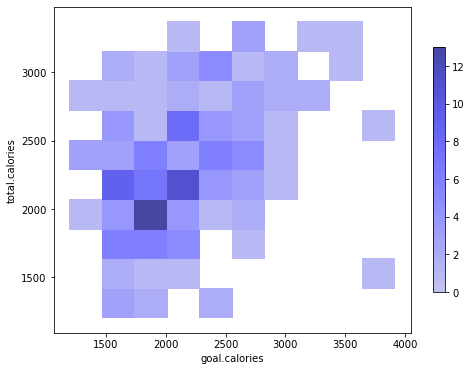

<AxesSubplot:xlabel='goal.carbs', ylabel='total.carbs'>

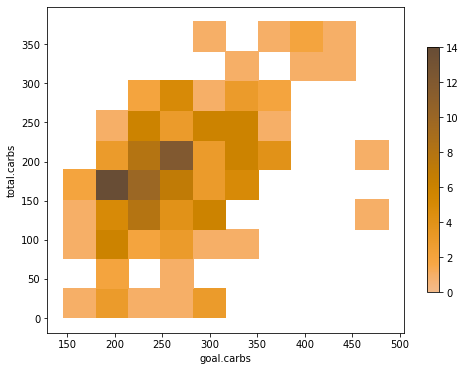

<AxesSubplot:xlabel='goal.fat', ylabel='total.fat'>

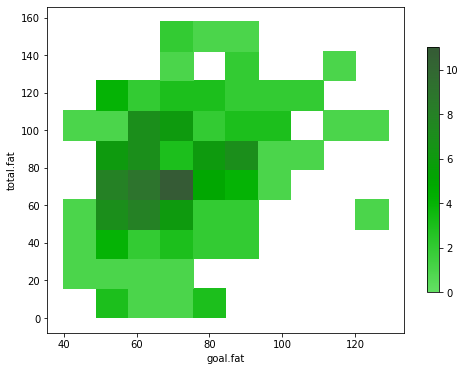

<AxesSubplot:xlabel='goal.protein', ylabel='total.protein'>

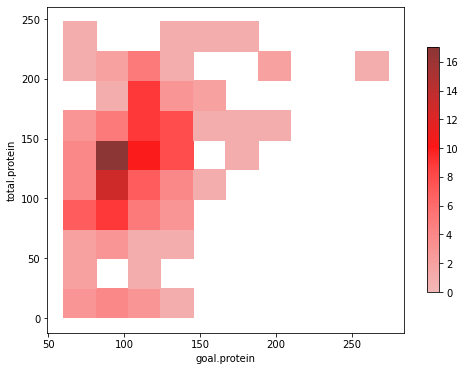

In [108]:
# Observering totals vs. goals
sns.histplot(
    id_1, x="goal.calories", y="total.calories",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="blue"
)
plt.savefig('calories.png')
plt.show()
sns.histplot(
    id_1, x="goal.carbs", y="total.carbs",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="orange"
)
plt.savefig('carbs.png')
plt.show()
sns.histplot(
    id_1, x="goal.fat", y="total.fat",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="green"
)
plt.savefig('fat.png')
plt.show()
sns.histplot(
    id_1, x="goal.protein", y="total.protein",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="red"
)
plt.savefig('protein.png')
plt.show()

In [109]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

id_1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
id_1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
id_1['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
id_1['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [110]:
column_indices = {name: i for i, name in enumerate(id_1.columns)}

n = len(id_1)
train_df = id_1[0:int(n*0.7)]
val_df = id_1[int(n*0.7):int(n*0.9)]
test_df = id_1[int(n*0.9):]

num_features = id_1.shape[1]

In [111]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<Figure size 864x432 with 0 Axes>

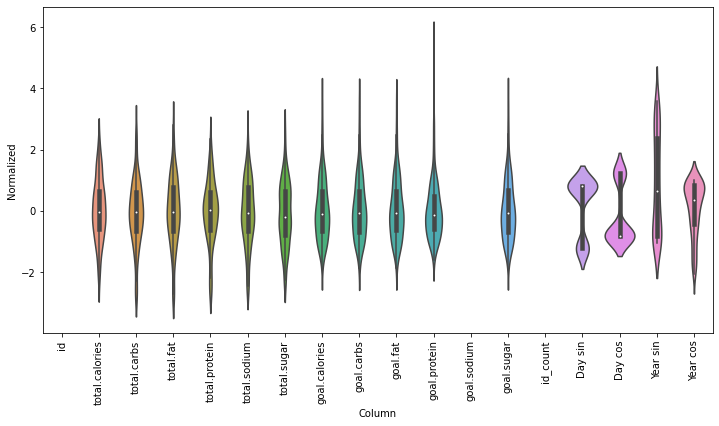

In [112]:
df_std = (id_1 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(id_1.keys(), rotation=90)